# MNIST examples

**NOTES**

Example code showing how to save model and reload to continue training:

- https://stackoverflow.com/questions/45393429/keras-how-to-save-model-and-continue-training
- https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint


In [1]:
import os

from ipywidgets import interact, interactive, fixed, interact_manual

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline  
# %matplotlib notebook  
%matplotlib widget
# %matplotlib ipympl

import tensorflow as tf
from tensorflow.keras import layers
# tf.compat.v1.enable_eager_execution()

In [2]:
tf.executing_eagerly()

True

In [3]:
print(tf.__version__)

2.1.0


In [4]:
device_name = tf.test.gpu_device_name()
print(device_name)

/device:GPU:0


In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18334978043570893940, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2446891275056855522
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2058577561737578566
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11235419751
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 1785914931165067905
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

## Classification

### Basic model

In [5]:
NUMPIXELS = 28
NUMFEATURES = NUMPIXELS*NUMPIXELS
BATCHSIZE = 64

In [6]:
# x_train.shape => (60000, 28, 28)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x.shape => (60000, 28*28)
x_train = x_train[:].reshape(60000, NUMFEATURES).astype('float32') / 255
x_test = x_test[:].reshape(10000, NUMFEATURES).astype('float32') / 255

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
NUMNODES = 64
NUMCLASSES = len(set(y_train))

inputs = tf.keras.Input(shape=(NUMFEATURES,), name='img')
x = layers.Dense(NUMNODES, activation='relu')(inputs)
x = layers.Dense(NUMNODES, activation='relu')(x)
outputs = layers.Dense(NUMCLASSES, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='mnist_basic')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


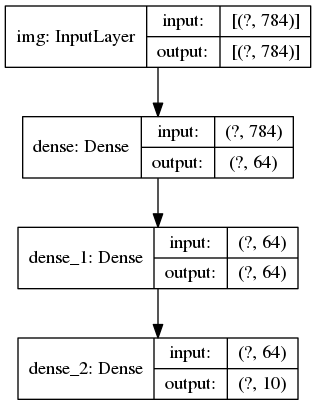

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [9]:
model.compile(loss='sparse_categorical_crossentropy', # sparse form allows us to use non-one-hot-encoded values, e.g. 7
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [10]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=5,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 3s 69us/sample - loss: 0.3448 - acc: 0.9016 - val_loss: 0.1813 - val_acc: 0.9482
Epoch 2/5
48000/48000 [==============================] - 2s 52us/sample - loss: 0.1593 - acc: 0.9522 - val_loss: 0.1459 - val_acc: 0.9570
Epoch 3/5
48000/48000 [==============================] - 2s 51us/sample - loss: 0.1165 - acc: 0.9651 - val_loss: 0.1215 - val_acc: 0.9657
Epoch 4/5
48000/48000 [==============================] - 3s 53us/sample - loss: 0.0933 - acc: 0.9716 - val_loss: 0.1260 - val_acc: 0.9643
Epoch 5/5
48000/48000 [==============================] - 3s 52us/sample - loss: 0.0771 - acc: 0.9772 - val_loss: 0.1150 - val_acc: 0.9675


In [11]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

10000/10000 - 0s - loss: 0.1069 - acc: 0.9678
Test loss: 0.10687744451896287
Test accuracy: 0.9678


### CNN model (convolutional neural net)

In [14]:
NUMPIXELS = 28
INPUTSHAPE = (NUMPIXELS, NUMPIXELS, 1)

In [15]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, NUMPIXELS, NUMPIXELS, 1).astype('float32')/255
x_test = x_test.reshape(10000, NUMPIXELS, NUMPIXELS, 1).astype('float32')/255
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

NUMCLASSES = len(y_train[0])

In [16]:
inputs = tf.keras.Input(shape=INPUTSHAPE, name='img2')
x = layers.Conv2D(32, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=(2, 2),
                        strides=(2, 2), # default = pool_size
                       )(x)
x = layers.Conv2D(64, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2),
                        strides=(2, 2), # default = pool_size
                       )(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(NUMCLASSES, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name='mnist_cnn')

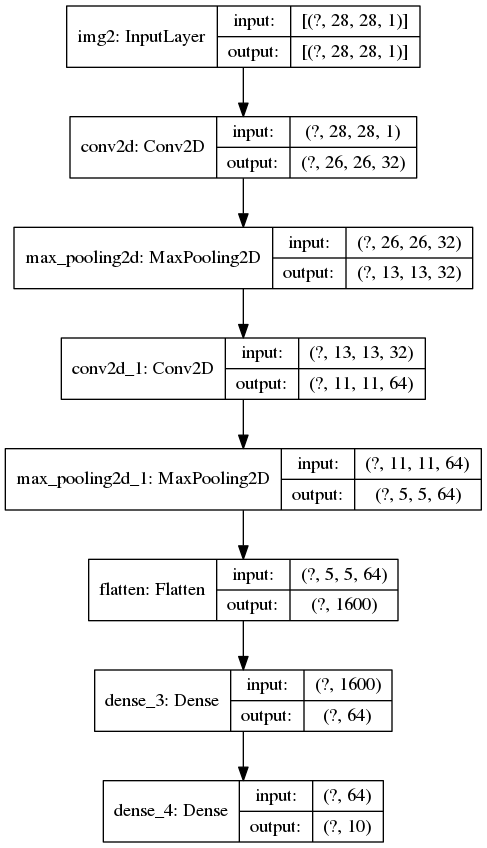

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=5
                   )
#                     ,
#                     validation_split=0.2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.1682 - acc: 0.9492
Epoch 2/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0493 - acc: 0.9850
Epoch 3/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0339 - acc: 0.9897
Epoch 4/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0266 - acc: 0.9918
Epoch 5/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0205 - acc: 0.9937


In [20]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

10000/10000 - 1s - loss: 0.0288 - acc: 0.9907
Test loss: 0.02878334880254406
Test accuracy: 0.9907


## Autoencoders

**NOTES**
- https://blog.keras.io/building-autoencoders-in-keras.html
- http://www.stokastik.in/understanding-variational-autoencoders/

In [8]:
NUMPIXELS = 28
INPUTSHAPE = (NUMPIXELS, NUMPIXELS, 1)
LATENTDIM = 2 # number of dimensions of latent space

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, NUMPIXELS, NUMPIXELS, 1).astype('float32')/255
x_test = x_test.reshape(10000, NUMPIXELS, NUMPIXELS, 1).astype('float32')/255

NUMCLASSES = len(set(y_train))

### Basic autoencoder

In [4]:
output_file = 'ae_mnist'
output_filepath = os.path.join('/', 'home', 'jupyter', 'model_assets', 'checkpoints', output_file+'.hdf5')

#### Train model

Train the model with GPU, save it to disk, then load it up on CPU-only VM to play around.

In [31]:
# define encoder
enc_inputs = tf.keras.Input(shape=INPUTSHAPE, name='enc_input')
x = layers.Conv2D(32, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  padding = 'same',
                  activation='relu')(enc_inputs)
x = layers.MaxPooling2D(pool_size=(2, 2),
                        padding = 'same')(x)
x = layers.Conv2D(64, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  padding = 'same',
                  activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2),
                        padding = 'same')(x)
shape_before_flattening = tf.keras.backend.int_shape(x)[1:]
x = layers.Flatten()(x)
enc_outputs = layers.Dense(LATENTDIM, name='enc_output')(x) # activation defaults to linear
enc_model = tf.keras.Model(inputs=enc_inputs, outputs=enc_outputs, name='encoder')


# define decoder
# TODO: examples on the web do this in several different flavors, 
# using Conv2D & UpSampling2D vs Conv2DTranspose with/without Upsampling or pooling.
# Perhaps try some variations to see how they behave
dec_inputs = tf.keras.Input(shape=(LATENTDIM,), name='dec_input')
x = layers.Dense(np.prod(shape_before_flattening))(dec_inputs)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(64, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  padding = 'same',
                  activation='relu')(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2DTranspose(32, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  padding = 'same',
                  activation='relu')(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2DTranspose(1, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  padding = 'same',
                  activation='sigmoid',
                  name='dec_output')(x)
dec_outputs = x
dec_model = tf.keras.Model(inputs=dec_inputs, outputs=dec_outputs, name='decoder')

model_ae_input = enc_inputs
model_ae_output = dec_model(enc_outputs)

model_ae = tf.keras.Model(model_ae_input, model_ae_output)

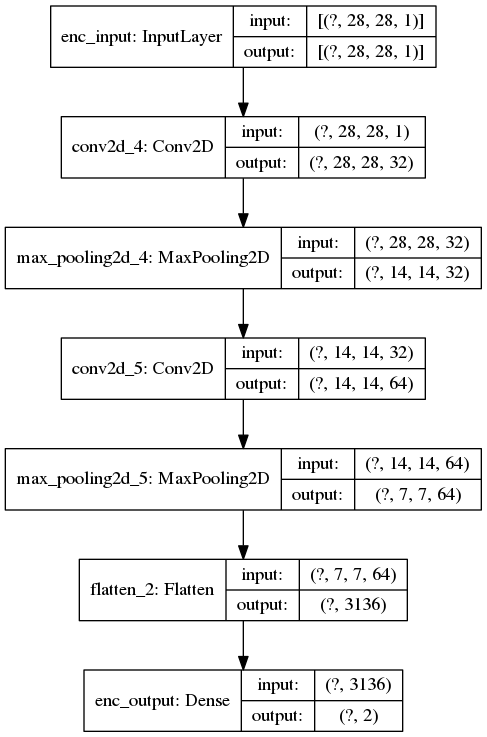

In [28]:
tf.keras.utils.plot_model(enc_model, show_shapes=True)

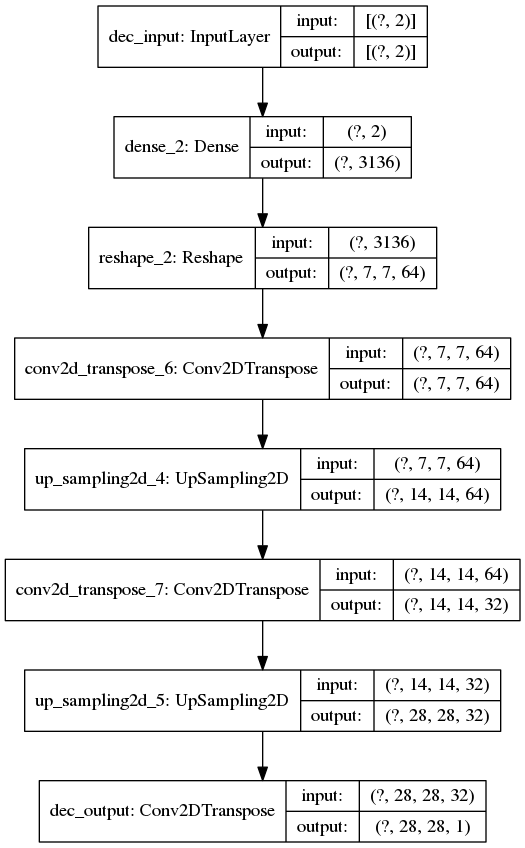

In [27]:
tf.keras.utils.plot_model(dec_model, show_shapes=True)

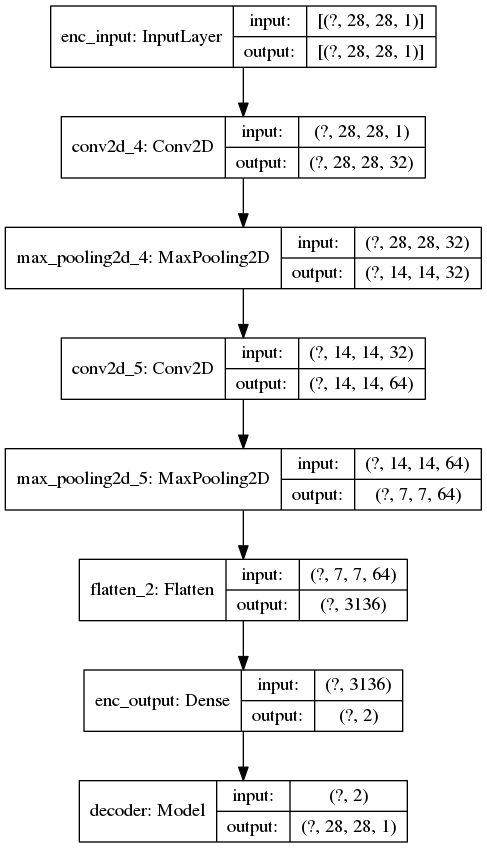

In [29]:
tf.keras.utils.plot_model(model_ae, show_shapes=True)

In [32]:
model_ae.compile(loss='binary_crossentropy',  # you could also use mse or define your own rmse custom loss
                 optimizer=tf.keras.optimizers.Adam())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [33]:
%time

checkpointer = tf.keras.callbacks.ModelCheckpoint(output_filepath, verbose=1, save_best_only=True)
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, verbose=1)


history = model_ae.fit(x_train, x_train,
                       batch_size=64,
                       epochs=50,
                       validation_split=0.2,
                       callbacks=[checkpointer, earlystopper]
                   )

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
47872/48000 [============================>.] - ETA: 0s - loss: 0.2284
Epoch 00001: val_loss improved from inf to 0.20250, saving model to /home/jupyter/model_assets/checkpoints/ae_mnist.hdf5
48000/48000 [==============================] - 10s 199us/sample - loss: 0.2283 - val_loss: 0.2025
Epoch 2/50
47616/48000 [============================>.] - ETA: 0s - loss: 0.1996
Epoch 00002: val_loss improved from 0.20250 to 0.19694, saving model to /home/jupyter/model_assets/checkpoints/ae_mnist.hdf5
48000/48000 [==============================] - 8s 173us/sample - loss: 0.1996 - val_loss: 0.1969
Epoch 3/50
47808/48000 [============================>.] - ETA: 0s - loss: 0.1951
Epoch 00003: val_loss improved from 0.19694 to 0.19276, saving model to /home/jupyter/model_assets/checkpoints/ae_mnist.hdf5
48000/48000 [==============================] - 8s 171us/sample - loss: 0.1951

#### Load saved model

In [5]:
model_ae = tf.keras.models.load_model(
    output_filepath,
    custom_objects=None,
    compile=True
)
enc_ae = tf.keras.Model(inputs=model_ae.input,
                           outputs=model_ae.get_layer('enc_output').output)
dec_ae = model_ae.get_layer(index=-1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Training/Test image preservation

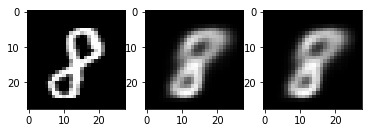

In [6]:
ind_r = np.random.randint(len(x_train))
# print(ind_r)

img_r = x_train[ind_r]
img_orig = img_r.reshape(NUMPIXELS, NUMPIXELS)

img_ae = model_ae.predict(np.array([img_r])).reshape(NUMPIXELS, NUMPIXELS)
img_enc = enc_ae.predict(np.array([img_r]))
img_dec = dec_ae.predict(img_enc).reshape(NUMPIXELS, NUMPIXELS)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img_orig, cmap='gray')
ax2.imshow(img_ae, cmap='gray')
ax3.imshow(img_dec, cmap='gray')

plt.show()

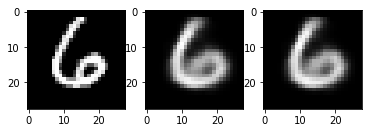

In [7]:
ind_r = np.random.randint(len(x_test))
# print(ind_r)

img_r = x_test[ind_r]
img_orig = img_r.reshape(NUMPIXELS, NUMPIXELS)

img_ae = model_ae.predict(np.array([img_r])).reshape(NUMPIXELS, NUMPIXELS)
img_enc = enc_ae.predict(np.array([img_r]))
img_dec = dec_ae.predict(img_enc).reshape(NUMPIXELS, NUMPIXELS)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img_orig, cmap='gray')
ax2.imshow(img_ae, cmap='gray')
ax3.imshow(img_dec, cmap='gray')

plt.show()

#### Mapping to latent space

In [8]:
x_train_encoded = enc_ae.predict(x_train)
x_test_encoded = enc_ae.predict(x_test)

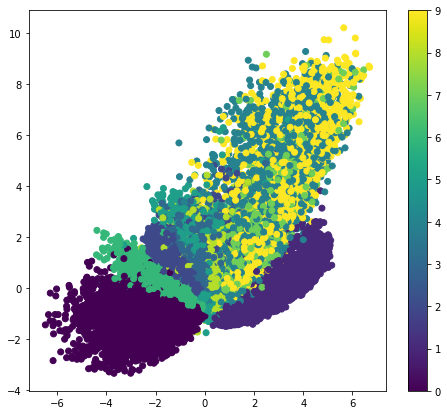

In [9]:
plt.figure(figsize=(8,7))
plt.scatter(x_train_encoded[:,0], x_train_encoded[:,1], c=y_train, cmap='viridis')
plt.colorbar()
plt.show()

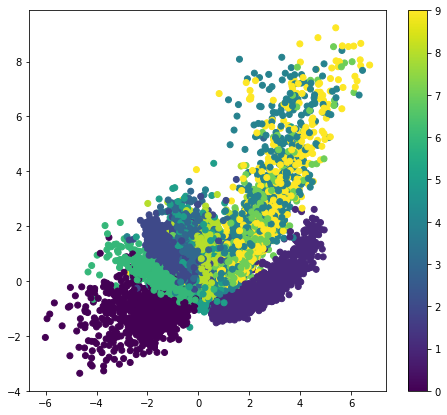

In [10]:
plt.figure(figsize=(8,7))
plt.scatter(x_test_encoded[:,0], x_test_encoded[:,1], c=y_test, cmap='viridis')
plt.colorbar()

plt.show()

#### Generate image from latent space vector

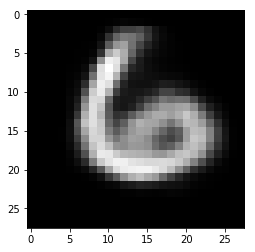

In [10]:
x = -2
y = 0.5
img_enc = np.array([[x, y]])
img_dec = dec_ae.predict(img_enc).reshape(NUMPIXELS, NUMPIXELS)

plt.imshow(img_dec, cmap='gray')

plt.show()

In [11]:
@interact(x=(-6, 6, 0.1), y=(-4,10,0.1))
def generate_digit(x, y):
    img_enc = np.array([[x, y]])
    img_dec = dec_ae.predict(img_enc).reshape(NUMPIXELS, NUMPIXELS)
    
    f = plt.figure(figsize=(10, 5))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    f1 = ax1.scatter(x_test_encoded[:,0], x_test_encoded[:,1], c=y_test, cmap='viridis')
    plt.colorbar(f1, ax=ax1)
    ax1.scatter([x], [y], c='red', s=80)
    f.tight_layout()
    
    ax2.imshow(img_dec, cmap='gray')
    


interactive(children=(FloatSlider(value=0.0, description='x', max=6.0, min=-6.0), FloatSlider(value=3.0, descr…

### Variational Autoencoder

**NOTES**
This implementation worked in TF 1.x, but not in 2.1. The problem stems from the scoping of variables. It is fixed in the next section.

In [4]:
output_file = 'vae_mnist'
output_filepath = os.path.join('/', 'home', 'jupyter', 'model_assets', 'checkpoints', output_file+'.hdf5')

#### Train model

In [12]:
def gaussian_sampling(args):
    mu0, log_var0 = args
    epsilon = tf.keras.backend.random_normal(shape=tf.keras.backend.shape(mu0), mean=0., stddev=1.)
    return mu0 + tf.keras.backend.exp(log_var0 / 2) * epsilon


# define encoder
enc_inputs = tf.keras.Input(shape=INPUTSHAPE, name='enc_input')
x = layers.Conv2D(32, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  padding = 'same',
                  activation='relu')(enc_inputs)
x = layers.MaxPooling2D(pool_size=(2, 2),
                        padding = 'same')(x)
x = layers.Conv2D(64, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  padding = 'same',
                  activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2),
                        padding = 'same')(x)
shape_before_flattening = tf.keras.backend.int_shape(x)[1:]
x = layers.Flatten()(x)

# x = layers.Dense(32, activation='relu')(x)

z_mu = layers.Dense(LATENTDIM, name='mu')(x)
z_log_var = layers.Dense(LATENTDIM, name='log_var')(x)
# encoder_mu_log_var = tf.keras.Model(inputs=enc_inputs, outputs=(mu, log_var), name='encoder_mu_log_var')
enc_outputs = layers.Lambda(gaussian_sampling, output_shape=(LATENTDIM,), name='enc_output')([z_mu, z_log_var])
enc_model = tf.keras.Model(inputs=enc_inputs, outputs=enc_outputs, name='encoder')


# define decoder
dec_inputs = tf.keras.Input(shape=(LATENTDIM,), name='dec_input')
x = layers.Dense(np.prod(shape_before_flattening))(dec_inputs)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(64, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  padding = 'same',
                  activation='relu')(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2DTranspose(32, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  padding = 'same',
                  activation='relu')(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2DTranspose(1, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  padding = 'same',
                  activation='sigmoid',
                  name='dec_output')(x)
dec_outputs = x
dec_model = tf.keras.Model(inputs=dec_inputs, outputs=dec_outputs, name='decoder')

model_vae_input = enc_inputs
model_vae_output = dec_model(enc_outputs)

model_vae = tf.keras.Model(model_vae_input, model_vae_output)

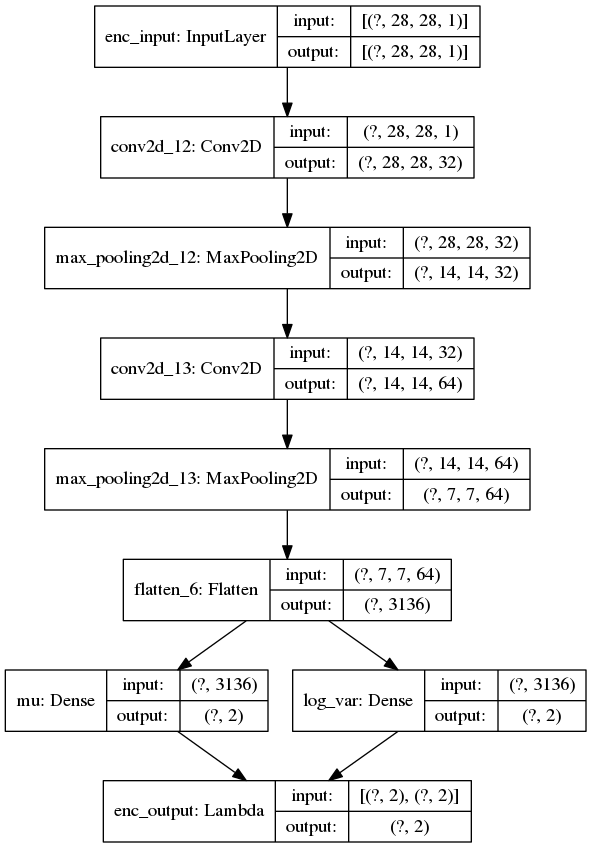

In [23]:
tf.keras.utils.plot_model(enc_model, show_shapes=True)

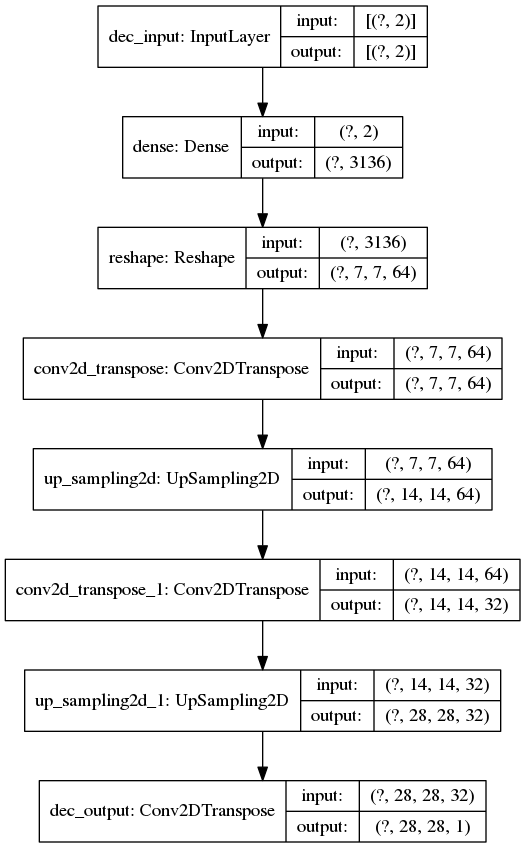

In [7]:
tf.keras.utils.plot_model(dec_model, show_shapes=True)

In [13]:
def var_loss_bce(y_true, y_pred):
    yin = tf.keras.backend.flatten(y_true)
    yout = tf.keras.backend.flatten(y_pred)
    bce_loss = tf.keras.metrics.binary_crossentropy(yin, yout)
    return bce_loss

def var_loss_kl(y_true, y_pred, x_log_var=z_log_var, x_mu=z_mu):
    kl_loss = -2*5e-4 * tf.keras.backend.mean(1 + x_log_var - tf.keras.backend.square(x_mu) - tf.keras.backend.exp(x_log_var), axis=-1)
    return  kl_loss

def var_loss_vae(y_true, y_pred, x_log_var=z_log_var, x_mu=z_mu):
    bce_loss = var_loss_bce(y_true, y_pred)
    kl_loss = var_loss_kl(y_true, y_pred, x_log_var, x_mu)
    return  tf.keras.backend.mean(bce_loss + kl_loss)

# model_vae.compile(loss=var_loss_bce, optimizer=tf.keras.optimizers.Adam(), metrics = [var_loss_vae, var_loss_bce, var_loss_kl])
# model_vae.compile(loss=var_loss_bce, optimizer=tf.keras.optimizers.Adam(), metrics = [var_loss_bce])
model_vae.compile(loss=var_loss_vae, optimizer=tf.keras.optimizers.Adam(), metrics = [var_loss_vae])

In [14]:
%time

checkpointer = tf.keras.callbacks.ModelCheckpoint(output_filepath, verbose=1, save_best_only=True)
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='var_loss_vae', mode='min', patience=1, verbose=1)

history = model_vae.fit(x_train, x_train,
                       batch_size=32,
                       epochs=10
                        ,
                       validation_split=0.2
                        ,
                       callbacks=[checkpointer, earlystopper]
                   )

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.68 µs
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
   32/48000 [..............................] - ETA: 13:16WARNING:tensorflow:Can save best model only with val_loss available, skipping.


_SymbolicException: Inputs to eager execution function cannot be Keras symbolic tensors, but found [<tf.Tensor 'log_var_3/Identity:0' shape=(None, 2) dtype=float32>, <tf.Tensor 'mu_3/Identity:0' shape=(None, 2) dtype=float32>]

In [47]:
model_vae.compile(loss=var_loss_vae, optimizer=tf.keras.optimizers.Adam(), metrics = [var_loss_vae, var_loss_bce, var_loss_kl])

In [48]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(output_filepath, verbose=1, save_best_only=True)
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=2, verbose=1)

history = model_vae.fit(x_train, x_train,
                       batch_size=32,
                       epochs=50
                        ,
                       validation_split=0.2
                        ,
                       callbacks=[checkpointer, earlystopper]
                   )

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
47936/48000 [============================>.] - ETA: 0s - loss: 0.1953 - var_loss_vae: 0.1953 - var_loss_bce: 0.1887 - var_loss_kl: 0.0066
Epoch 00001: val_loss improved from inf to 0.19524, saving model to /home/jupyter/model_assets/checkpoints/vae_mnist.hdf5
48000/48000 [==============================] - 18s 366us/sample - loss: 0.1953 - var_loss_vae: 0.1953 - var_loss_bce: 0.1887 - var_loss_kl: 0.0066 - val_loss: 0.1952 - val_var_loss_vae: 0.1952 - val_var_loss_bce: 0.1889 - val_var_loss_kl: 0.0063
Epoch 2/50
47968/48000 [============================>.] - ETA: 0s - loss: 0.1943 - var_loss_vae: 0.1943 - var_loss_bce: 0.1880 - var_loss_kl: 0.0063
Epoch 00002: val_loss improved from 0.19524 to 0.19456, saving model to /home/jupyter/model_assets/checkpoints/vae_mnist.hdf5
48000/48000 [==============================] - 15s 315us/sample - loss: 0.1943 - var_loss_vae: 0.1943 - var_loss_bce: 0.1879 - var_loss_kl: 0.0063 - val_loss:

#### Load saved model

In [52]:
model_vae = tf.keras.models.load_model(
    output_filepath,
    custom_objects=None,
    compile=False
)
# comple=False because the original loss function doesn't get saved with the model apparently. I believe that
# is why other people encde the loss directly into a layer, so when the model is saved, the loss is also
# saved: an improvement for the future.
# The below compile requires var_loss_vae being defined from cells above
model_vae.compile(loss=var_loss_vae, optimizer=tf.keras.optimizers.Adam(), metrics = [var_loss_vae, var_loss_bce, var_loss_kl])
enc_vae = tf.keras.Model(inputs=model_vae.input,
                           outputs=model_vae.get_layer('mu').output)
dec_vae = model_vae.get_layer(index=-1)

#### Training/Test image preservation

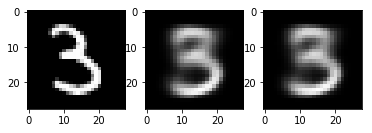

In [65]:
ind_r = np.random.randint(len(x_train))
# print(ind_r)

img_r = x_train[ind_r]
img_orig = img_r.reshape(NUMPIXELS, NUMPIXELS)

img_vae = model_vae.predict(np.array([img_r])).reshape(NUMPIXELS, NUMPIXELS)
img_enc = enc_vae.predict(np.array([img_r]))
img_dec = dec_vae.predict(img_enc).reshape(NUMPIXELS, NUMPIXELS)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img_orig, cmap='gray')
ax2.imshow(img_vae, cmap='gray')
ax3.imshow(img_dec, cmap='gray')

plt.show()

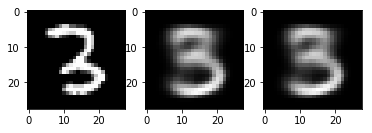

In [75]:
ind_r = np.random.randint(len(x_test))
# print(ind_r)

img_r = x_test[ind_r]
img_orig = img_r.reshape(NUMPIXELS, NUMPIXELS)

img_vae = model_vae.predict(np.array([img_r])).reshape(NUMPIXELS, NUMPIXELS)
img_enc = enc_vae.predict(np.array([img_r]))
img_dec = dec_vae.predict(img_enc).reshape(NUMPIXELS, NUMPIXELS)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img_orig, cmap='gray')
ax2.imshow(img_vae, cmap='gray')
ax3.imshow(img_dec, cmap='gray')

plt.show()

#### Mapping to latent space

In [69]:
# x_train_encoded = enc_vae.predict(x_train)
x_test_encoded = enc_vae.predict(x_test)

**NOTE:**
The plot below seems to indicate that the training didn't work very well. The points should be more concentrated in the region of x1=[-1,1], and x2=[-1,1]. Also, there isn't good separation between half of the digits, e.g. '9' is spread out and overlaps with '3' etc.

To solve this would probably require a deeper dive into hyperparamter adjustment, and implementing a dynamic ramp-up of the KL loss term (and maybe using batch norm and other tricks).

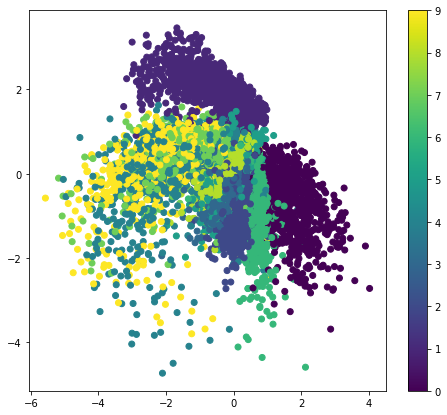

In [70]:
plt.figure(figsize=(8,7))
plt.scatter(x_test_encoded[:,0], x_test_encoded[:,1], c=y_test, cmap='viridis')
plt.colorbar()

plt.show()

#### Generate image from latent space vector

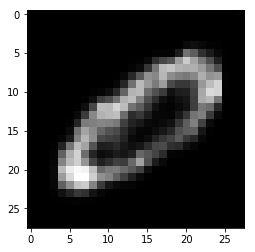

In [73]:
x = 2
y = 1
img_enc = np.array([[x, y]])
img_dec = dec_vae.predict(img_enc).reshape(NUMPIXELS, NUMPIXELS)

plt.imshow(img_dec, cmap='gray')

plt.show()

In [74]:
@interact(x=(-6, 6, 0.1), y=(-4,10,0.1))
def generate_digit(x, y):
    img_enc = np.array([[x, y]])
    img_dec = dec_vae.predict(img_enc).reshape(NUMPIXELS, NUMPIXELS)
    
    f = plt.figure(figsize=(10, 5))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    f1 = ax1.scatter(x_test_encoded[:,0], x_test_encoded[:,1], c=y_test, cmap='viridis')
    plt.colorbar(f1, ax=ax1)
    ax1.scatter([x], [y], c='red', s=80)
    f.tight_layout()
    
    ax2.imshow(img_dec, cmap='gray')
    


interactive(children=(FloatSlider(value=0.0, description='x', max=6.0, min=-6.0), FloatSlider(value=3.0, descr…

### Variational Autoencoder - Version 2

**NOTES**
This version uses a custom layer in order to hold a reference to the z_mu and z_log_var layers to use in the custom loss function.

In [10]:
output_file = 'vae_mnist'
output_filepath = os.path.join('/', 'home', 'jupyter', 'taureau', '_model_assets', 'checkpoints', output_file+'.hdf5')

#### Train model

In [30]:
def gaussian_sampling(args):
    mu0, log_var0 = args
    epsilon = tf.keras.backend.random_normal(shape=tf.keras.backend.shape(mu0), mean=0., stddev=1.)
    return mu0 + tf.keras.backend.exp(log_var0 / 2) * epsilon


# define encoder
enc_inputs = tf.keras.Input(shape=INPUTSHAPE, name='enc_input')
x = layers.Conv2D(32, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  padding = 'same',
                  activation='relu')(enc_inputs)
x = layers.MaxPooling2D(pool_size=(2, 2),
                        padding = 'same')(x)
x = layers.Conv2D(64, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  padding = 'same',
                  activation='relu')(x)
x = layers.MaxPooling2D(pool_size=(2, 2),
                        padding = 'same')(x)
shape_before_flattening = tf.keras.backend.int_shape(x)[1:]
x = layers.Flatten()(x)

# x = layers.Dense(32, activation='relu')(x)

z_mu = layers.Dense(LATENTDIM, name='mu')(x)
z_log_var = layers.Dense(LATENTDIM, name='log_var')(x)
# encoder_mu_log_var = tf.keras.Model(inputs=enc_inputs, outputs=(mu, log_var), name='encoder_mu_log_var')
enc_outputs = layers.Lambda(gaussian_sampling, output_shape=(LATENTDIM,), name='enc_output')([z_mu, z_log_var])
enc_model = tf.keras.Model(inputs=enc_inputs, outputs=enc_outputs, name='encoder')


# define decoder
dec_inputs = tf.keras.Input(shape=(LATENTDIM,), name='dec_input')
x = layers.Dense(np.prod(shape_before_flattening))(dec_inputs)
x = layers.Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(64, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  padding = 'same',
                  activation='relu')(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2DTranspose(32, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  padding = 'same',
                  activation='relu')(x)
x = layers.UpSampling2D(size=(2, 2))(x)
x = layers.Conv2DTranspose(1, 
                  kernel_size=(3, 3), 
                  strides=(1, 1), # default = (1,1)
                  padding = 'same',
                  activation='sigmoid',
                  name='dec_output')(x)
dec_model = tf.keras.Model(dec_inputs, x, name='decoder')
dec_outputs = dec_model(enc_outputs)

# define custom layer to house the custom loss
class CustomVariationalLayer(layers.Layer):
    def vae_loss(self, x_input, x_decoder, x_mu, x_log_var):
        xin = tf.keras.backend.flatten(x_input)
        xout = tf.keras.backend.flatten(x_decoder)
        bce_loss = tf.keras.metrics.binary_crossentropy(xin, xout)
        kl_loss = -2*5e-4 * tf.keras.backend.mean(1 + x_log_var - tf.keras.backend.square(x_mu) - tf.keras.backend.exp(x_log_var), axis=-1)
        return tf.keras.backend.mean(bce_loss + kl_loss)

    def call(self, inputs):
        x_input = inputs[0]
        x_decoder = inputs[1]
        x_mu = inputs[2]
        x_log_var = inputs[3]
        loss = self.vae_loss(x_input, x_decoder, x_mu, x_log_var)
        self.add_loss(loss, inputs=inputs)
        return x_decoder

# We call our custom layer on the input and the decoded output, to obtain the final model output.
var_loss_outputs = CustomVariationalLayer()([enc_inputs, dec_outputs, z_mu, z_log_var])

model_vae = tf.keras.Model(enc_inputs, var_loss_outputs)
model_vae.compile(optimizer=tf.keras.optimizers.Adam())

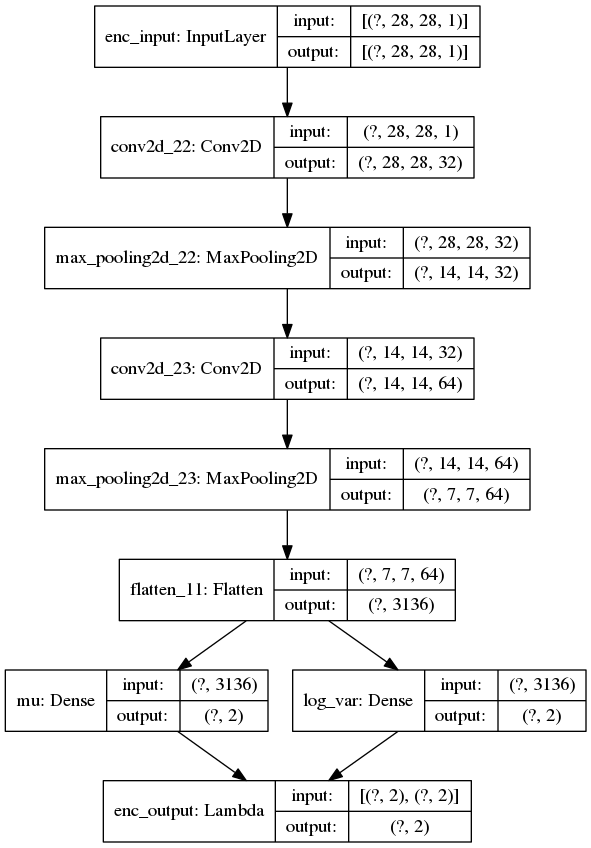

In [23]:
tf.keras.utils.plot_model(enc_model, show_shapes=True)

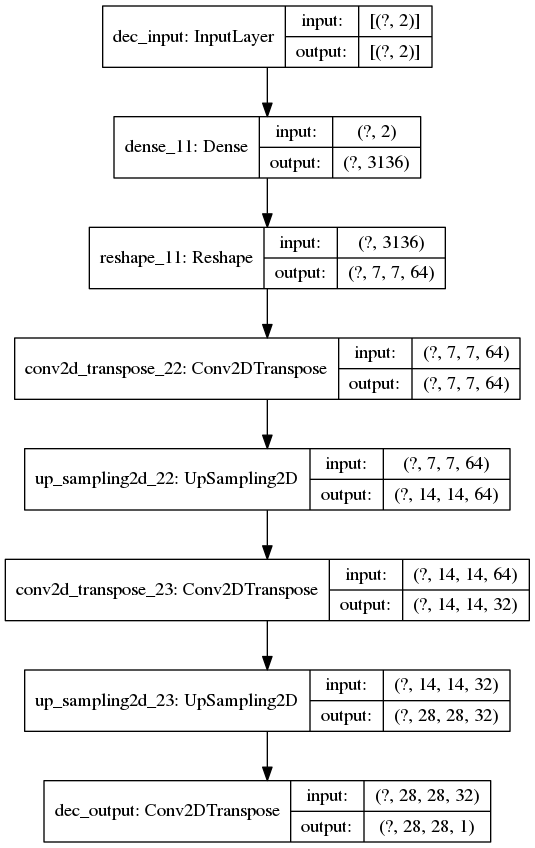

In [24]:
tf.keras.utils.plot_model(dec_model, show_shapes=True)

In [31]:
%time

checkpointer = tf.keras.callbacks.ModelCheckpoint(output_filepath, verbose=1, save_best_only=True)
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=2, verbose=1)

history = model_vae.fit(x_train, None,
                       batch_size=32,
                       epochs=50
                        ,
                       validation_split=0.2
                        ,
                       callbacks=[checkpointer, earlystopper]
                   )

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.34 µs
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
47936/48000 [============================>.] - ETA: 0s - loss: 0.2219
Epoch 00001: val_loss improved from inf to 0.20622, saving model to /home/jupyter/taureau/_model_assets/checkpoints/vae_mnist.hdf5
48000/48000 [==============================] - 14s 288us/sample - loss: 0.2219 - val_loss: 0.2062
Epoch 2/50
47840/48000 [============================>.] - ETA: 0s - loss: 0.2043
Epoch 00002: val_loss improved from 0.20622 to 0.20152, saving model to /home/jupyter/taureau/_model_assets/checkpoints/vae_mnist.hdf5
48000/48000 [==============================] - 12s 255us/sample - loss: 0.2043 - val_loss: 0.2015
Epoch 3/50
47840/48000 [============================>.] - ETA: 0s - loss: 0.2006
Epoch 00003: val_loss improved from 0.20152 to 0.19872, saving model to /home/jupyter/taureau/_model_assets/checkpoints/vae_mnist.hdf5
48000/48000 [==============================] -

#### Load saved model

In [35]:
model_vae = tf.keras.models.load_model(
    output_filepath,
    custom_objects={'CustomVariationalLayer': CustomVariationalLayer},
    compile=True
)

enc_vae = tf.keras.Model(inputs=model_vae.input,
                           outputs=model_vae.get_layer('mu').output)
dec_vae = model_vae.get_layer(index=-2)

#### Training/Test image preservation

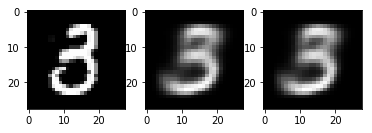

In [38]:
ind_r = np.random.randint(len(x_train))
# print(ind_r)

img_r = x_train[ind_r]
img_orig = img_r.reshape(NUMPIXELS, NUMPIXELS)

img_vae = model_vae.predict(np.array([img_r])).reshape(NUMPIXELS, NUMPIXELS)
img_enc = enc_vae.predict(np.array([img_r]))
img_dec = dec_vae.predict(img_enc).reshape(NUMPIXELS, NUMPIXELS)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img_orig, cmap='gray')
ax2.imshow(img_vae, cmap='gray')
ax3.imshow(img_dec, cmap='gray')

plt.show()

#### Mapping to latent space

In [39]:
# x_train_encoded = enc_vae.predict(x_train)
x_test_encoded = enc_vae.predict(x_test)

**NOTE:**
The plot below seems to indicate that the training didn't work very well. The points should be more concentrated in the region of x1=[-1,1], and x2=[-1,1]. Also, there isn't good separation between half of the digits, e.g. '9' is spread out and overlaps with '3' etc.

To solve this would probably require a deeper dive into hyperparamter adjustment, and implementing a dynamic ramp-up of the KL loss term (and maybe using batch norm and other tricks).

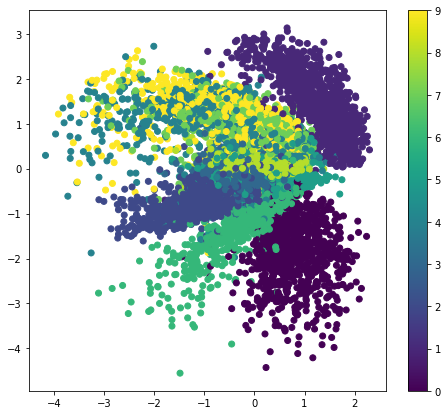

In [40]:
plt.figure(figsize=(8,7))
plt.scatter(x_test_encoded[:,0], x_test_encoded[:,1], c=y_test, cmap='viridis')
plt.colorbar()

plt.show()

#### Generate image from latent space vector

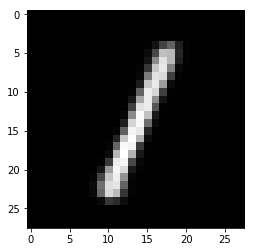

In [41]:
x = 2
y = 1
img_enc = np.array([[x, y]])
img_dec = dec_vae.predict(img_enc).reshape(NUMPIXELS, NUMPIXELS)

plt.imshow(img_dec, cmap='gray')

plt.show()

In [42]:
@interact(x=(-6, 6, 0.1), y=(-4,10,0.1))
def generate_digit(x, y):
    img_enc = np.array([[x, y]])
    img_dec = dec_vae.predict(img_enc).reshape(NUMPIXELS, NUMPIXELS)
    
    f = plt.figure(figsize=(10, 5))
    ax1 = f.add_subplot(121)
    ax2 = f.add_subplot(122)

    f1 = ax1.scatter(x_test_encoded[:,0], x_test_encoded[:,1], c=y_test, cmap='viridis')
    plt.colorbar(f1, ax=ax1)
    ax1.scatter([x], [y], c='red', s=80)
    f.tight_layout()
    
    ax2.imshow(img_dec, cmap='gray')
    


interactive(children=(FloatSlider(value=0.0, description='x', max=6.0, min=-6.0), FloatSlider(value=3.0, descr…